In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import pylab as pl
import scipy.stats as st
import seaborn as sns
import pandas as pd
import detection as dtc
import fitting
import emission
from constants import *
import cross_sections as cs
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from math import gamma
from scipy.integrate import simps, simpson
from tqdm import tqdm
import os
from sklearn.metrics import r2_score
from random import choices


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

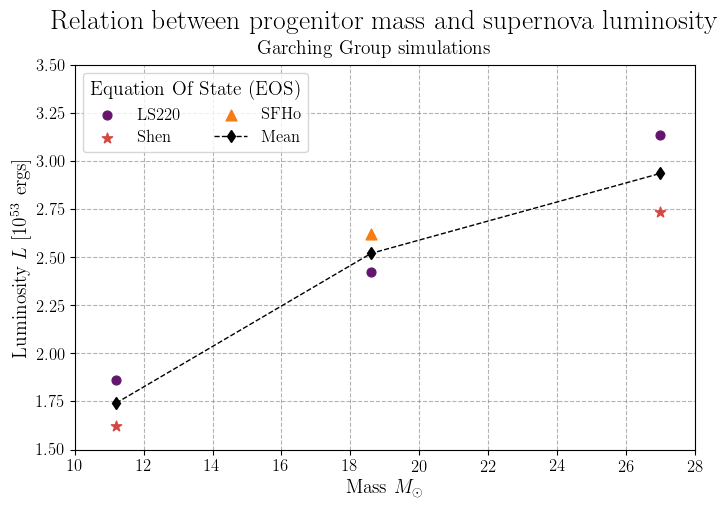

In [13]:
fig, ax = plt.subplots(figsize = (8,5))
plt.grid(True, ls = '--', color = 'grey', alpha = 0.6)
plt.scatter([11.2, 18.6, 27.0], [np.sum(params['LS220-11.2'][-3:])/1e53, 2.420, np.sum(params['LS220-27.0'][-3:])/1e53],
           color = sns.color_palette('inferno')[1], s = 40, marker = 'o', label = 'LS220')
plt.scatter([11.2, 27.0], [np.sum(params['Shen-11.2'][-3:])/1e53, np.sum(params['Shen-27.0'][-3:])/1e53],
           color = sns.color_palette('inferno')[3], s = 60, marker = '*', label = 'Shen')
plt.scatter([18.6], [2.618],
           color = sns.color_palette('inferno')[4], s = 60, marker = '^', label = 'SFHo')
plt.plot([11.2, 18.6, 27.0], [(np.sum(params['Shen-11.2'][-3:]) + np.sum(params['LS220-11.2'][-3:]))/2e53,
                              (2.420 + 2.618)/2,
                           (np.sum(params['Shen-27.0'][-3:]) + np.sum(params['LS220-27.0'][-3:]))/2e53],
           color = 'black', marker = 'd', ls = '--', lw = 1, label = 'Mean')
plt.xlabel(r'Mass $M_\odot$', fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlim(10, 28)
plt.ylabel(r'Luminosity $L$ [$10^{53}$ ergs]', fontsize = 14)
plt.yticks(fontsize = 12)
plt.ylim(1.5, 3.5)
lgd = plt.legend(title = 'Equation Of State (EOS)', loc = 'upper left', fontsize = 12, ncol = 2)
lgd.get_title().set_fontsize(14)
plt.title('Relation between progenitor mass and supernova luminosity', fontsize = 20,
          pad = 26)
fig.text(0.5, 0.9, 'Garching Group simulations', fontsize = 14, ha = 'center')
plt.savefig('Plots/Relation_progenitor_mass_and_L.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('Plots/Relation_progenitor_mass_and_L.svg', dpi = 300, bbox_inches = 'tight')
plt.show()